# Plotting

In this quickstart, we'll show all kind of examples. As PySport encourages OpenSource projects, all examples use other sports analytics packages in combination with kloppy. You can find more packages at https://opensource.pysport.org/


## Plotting events using mplsoccer

In this example the [mplsoccer](https://github.com/andrewRowlinson/mplsoccer) package by [Andy Rowlinson](https://twitter.com/numberstorm) is used.


In [1]:
import sys
!{sys.executable} -m pip install mplsoccer matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
## Load data

from mplsoccer.pitch import Pitch
from kloppy import statsbomb

dataset = statsbomb.load_open_data(
    event_types=["pass"], 
    coordinates="statsbomb"
)

home_team, away_team = dataset.metadata.teams

messi = home_team.players[9]
print(f"Going to show passes of: {messi}")

Going to show passes of: Lionel Andrés Messi Cuccittini


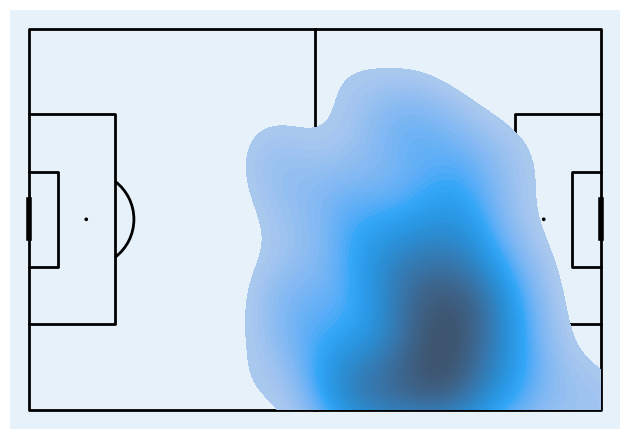

In [3]:
df = (
    dataset
    .filter(lambda event: event.player == messi)
    .to_df()
)


pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, ax = pitch.draw()
plot = pitch.kdeplot(
    df["coordinates_x"],
    df["coordinates_y"],
    ax=ax,
    fill=True,
    n_levels=50,
)